# **Chapter 04**  
**┗ 품질 등급화**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「품질 데이터 산포 확인하기」
* 🥈Session 2 - 「PCA를 통한 품질 데이터 Scaling」
* 🥇Session 3 - 「품질 등급화」

In [2]:
# ▶ Warnings 제거

import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/데이터분석/파이썬_실습/ML 실습/ML실습/ML실습/4_품질 등급화')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/데이터분석/파이썬_실습/ML 실습/ML실습/ML실습/4_품질 등급화'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🍷🅰 (품질 관리자, 생산 관리자)

```
A공장에서는 매 달 품질검사를 통해 정상품 와인을 등급별로 출하한다. 품질(Quality)로 **일정한 맛의 Wine을 출하하도록 노력하지만,  
소비자 측에서 맛에 대한 클레임(필드 불량)이 종종 발생하는 VOC가 수집**되고 있다.맛의 변화를 일으키는 원인을 찾고
일정한 맛으로 Wine을 생산하고자 한다.

```  

> **데이터 살펴보기**

* 생산된 와인의 품질(quality)과 품질 검사시 기록된 공정데이터 이다.
* 데이터 명세 ⬇

|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|pH|sulphates|alcohol|quality|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|산도|휘발선상|시트르산|잔당|염화물|독립 이산화황|총 이산화항|밀도|수소이온농도|황산염|도수|품질|

In [3]:
#  Data read
 #pd.read_csv('파일명.csv', sep = '구분자')
  #csv는 쉼표로 구분된 파일이기 때문에 default로 sep = ',' 가 들어가있지만, 이 데이터는 ;로 구분되어 있음
import pandas as pd
df1 = pd.read_csv('4_winequality_red.csv', sep=';')
df2 = pd.read_csv('4_winequality_white.csv', sep=';')

df=pd.concat([df1, df2], axis=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 동일 품질(Quality) Wine에 일정하지 않은 맛
```  

> **기대효과**

```
▶ 동일 품질(Quality) Wine에 일정한 맛, 필드 불량 감소, 고객 Claim 감소
```

> **해결방안**

```
▶ Wine 생산 공정 변수 중 맛의 변화를 일으키는 주요 인자 도출 및 Control
▶ Session 1 🥉
 - 데이터 전처리 및 품질(Quality) Data EDA
▶ Session 2 🥈
 - 차원 축소(PCA) 방법을 통한 품질(Quality) Data 살펴보기
▶ Session 3 🥇
 - 품질(Quality) 기준 설정, 등급 부여, 공정변수 확인
```

> **성과측정**  

```
▶ 주요인자 Control 전/후 필드 불량률 비교
▶ 생산 공정 Target spec을 Tight하게 적용 했을 때 기존 대비 검사 통과율 비교 (상한선과 하한선을 정하는 등 스펙 관리)
```

> **현업적용**  

```
▶ 제품 품질 검사 시 발생하는 검사 Data 실시간 수집 체계 구축
▶ 수집된 검사 Data를 Model에 Input 후 필드 불량 발생 확률 높은 상품 재검사 수행
▶ 재검사 후 출하
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → np.where(), plt.subplot()
▶ session 2 → StandardScaler(),  PCA(), make_pipeline(scaler,pca)
▶ session 3 → pca.fit_transform(), plt.vlines(), plt.hlines()
```

## **🥉Session 1**  
**┗ 품질 데이터 산포 확인하기**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# ▶ Data 형태 확인
print('df', df.shape)
print('')
df.info()

df (6497, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [ ]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# ▶ Outlier 확인, 음수값 확인
df.describe()

#공정변수들이기 때문에 -가 없을 것으로 예측했는데, 실제로도 없는 것으로 보아 정상적인 데이터들이 수집되고 있음

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### · 품질(Quality) Data EDA
---
* 수집된 데이터 EDA


In [ ]:
# ▶ Wine 품질별 데이터 확인
 #quality가 높을 수록 고품질
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
# ▶ Quality를 그룹핑을 통해 부족한 데이터를 보완
# ▶ 3,4,5 → 1(Low) / 6 → 2(Medium) / 7,8,9 → 3(High)

import numpy as np

import numpy as np
df['quality'] = np.where(df['quality']<=5, 1, np.where(df['quality']==6, 2, 3))
df['quality'].value_counts()

2    2836
1    2384
3    1277
Name: quality, dtype: int64

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


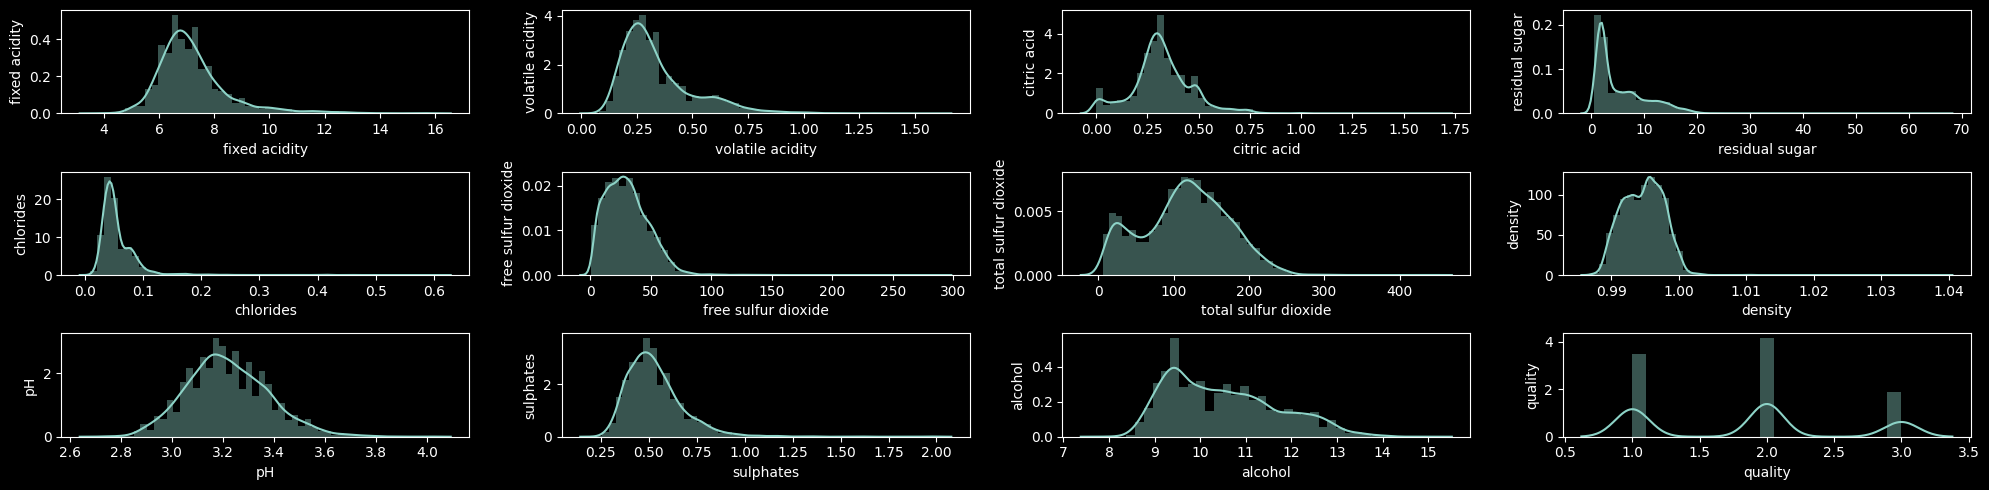

In [ ]:
# ▶ 전체 데이터 산포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

for i in range(0,12):                       # for i in range(len(df.columns))
    plt.subplot(3,4,i+1)                    # subplot 시작점을 지정하기 위해 i+1 활용 (예전에 i-3을 한 것과 유사)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])
    plt.ylabel(df.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

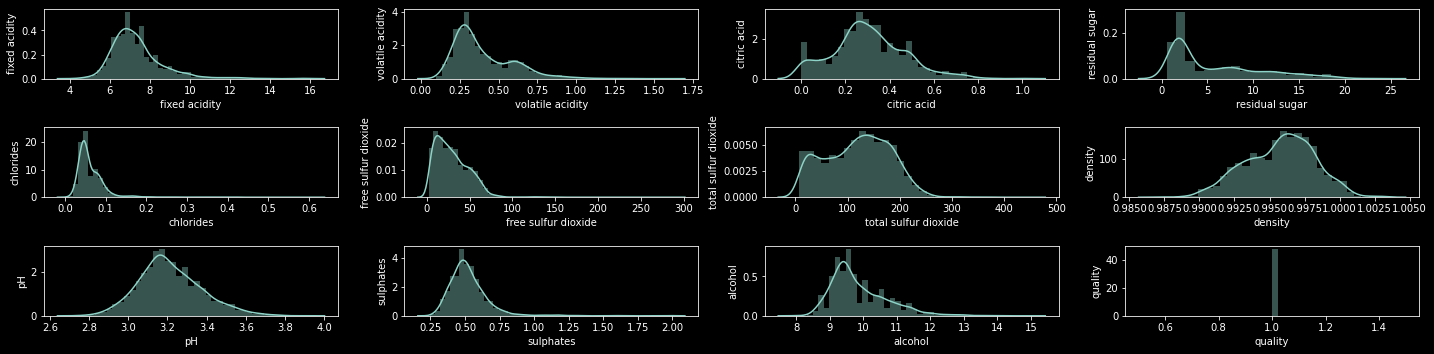

In [ ]:
# ▶ 품질 1등급 데이터 산포 확인 (분포)
df1 = df[df['quality']==1]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    sns.distplot(df1.iloc[:,i])
    plt.grid(False)
    plt.ylabel(df1.columns[i])

#plt.figure(figsize=(20,5)) 는 안됨
 #왜냐면 sns로 시각화 했기 때문

plt.gcf().set_size_inches(20,5)
plt.tight_layout()
plt.show()

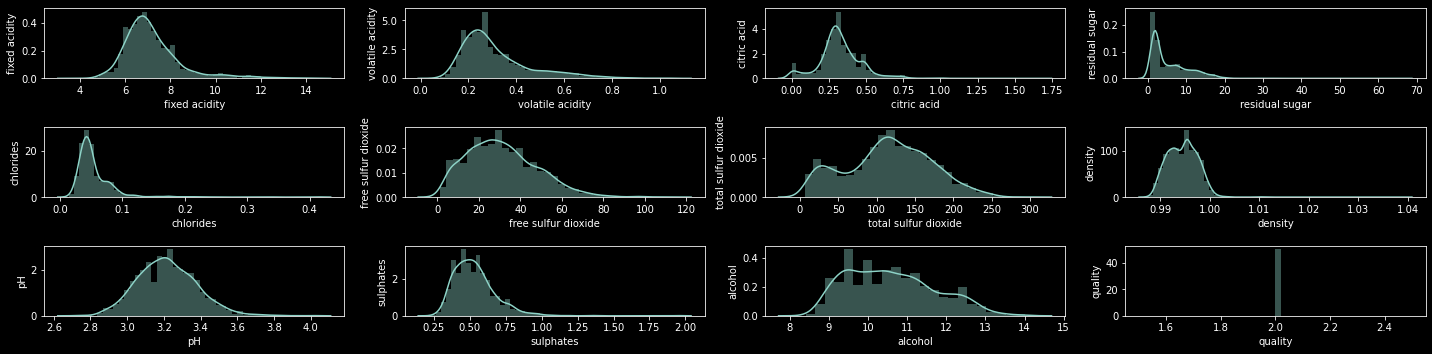

In [ ]:
# ▶ 품질 2등급 데이터 산포 확인
df2=df[df['quality']==2]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df2.iloc[:,i])
    plt.ylabel(df2.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

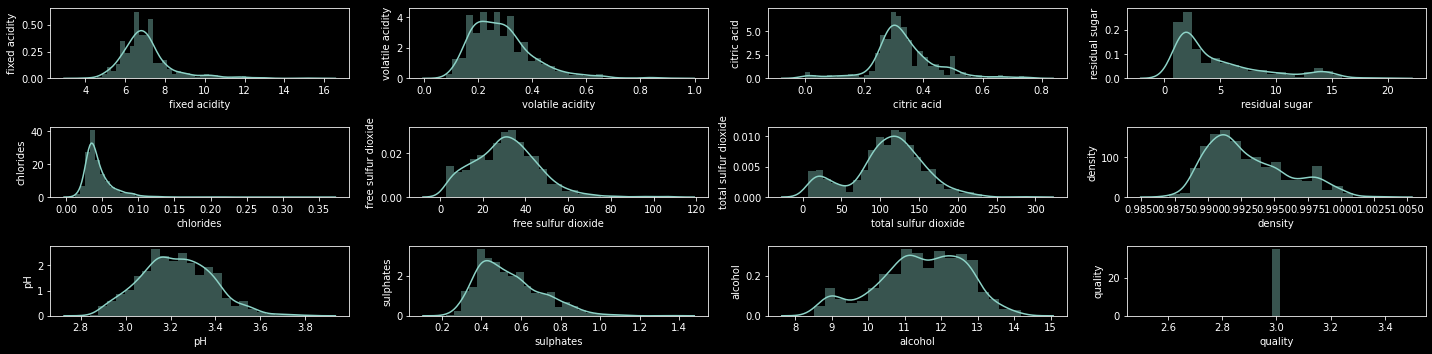

In [ ]:
# ▶ 품질 3등급 데이터 산포 확인
df3=df[df['quality']==3]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df3.iloc[:,i])
    plt.ylabel(df3.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

## **🥈Session 2**  
**┗ PCA를 통한 품질 데이터 Scaling**  
---

* 같은 Quality group에 속해있는 Wine 상품들은 동일한 Spec으로 생산되어져야 공정능력이 관리된다고 할 수 있음
* Wine 공정 변수에 Target Spec에서 멀어진(평균과 거리가 떨어진) 정도가 큰 변수일 수록 공정관리가 필요한 변수

### · 차원 축소
---
* Wine Quality data는 index column과 type('red','white')을 제외하고는 12개의 차원으로 이루어진 데이터다.
* 여기서는 그래프로 표현할 수 있는 2차원으로 차원을 축소하여 평균으로 부터 멀어진 데이터들을 낮은 품질의 제품으로 판정하고자 한다.


In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
# ▶ 품질별 PCA 진행 및 설명력 확인
 #PCA를 하기전에는 standardScaler 반드시 진행
  #그래서 pipeline = make_pipleine(standardScaler, pca) 로 하면 편함
# ▶ PCA에 대한 이론 및 옵션에 대한 추가 공부 필요
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#여기서 var_ratio 는 ~% 이상의 데이터 설명력을 갖는 차원축소를 진행하겠다는 뜻
def pca_feature_var(data, var_ratio) :
    roop_ix=data['quality'].unique()

    fig, ax = plt.subplots(len(roop_ix), 1, figsize = (10, 10))

#enumerate 활용
    for i,x in enumerate(roop_ix):
        df1=data[(data['quality']==x)]
        X=df1.drop(['quality'], axis=1)             #target 인 quality는 제거


        # Create scaler: scaler
        scaler = StandardScaler()

        # Create a PCA instance: pca
        pca = PCA()

        # Create pipeline: pipeline
        pipeline = make_pipeline(scaler,pca)

        # Fit the pipeline to 'samples' (X를 학습)
        pipeline.fit(X)
        features = range(pca.n_components_)

        feature_df=pd.DataFrame(data=features,columns=['pc_feature'])
        variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
        pc_feature_df=pd.concat([feature_df,variance_df],axis=1)

        #'누적합'을 표현
        cumsum = np.cumsum(pca.explained_variance_ratio_)
        #데이터에서 가장 큰 값 표시 np.armax
        d = np.argmax(cumsum >= var_ratio) + 1
        print('quality:', x ,'/ 선택할 차원 수 :', d, '/ 변수 설명력', cumsum[d-1])
        singular_vector=pd.DataFrame(pca.components_.T,index=X.columns)
        print(singular_vector)
        print("--------------------------------------------------------------------------------------------------------------------------")
        sns.barplot(ax=ax[i], x='pc_feature', y='variance', data=pc_feature_df)
        plt.xlabel('PCA feature')
        plt.ylabel('variance')

quality: 1 / 선택할 차원 수 : 2 / 변수 설명력 0.5021112821016065
                            0         1         2         3         4   \
fixed acidity        -0.162490  0.373834  0.443589 -0.318594  0.158819   
volatile acidity     -0.373864  0.185705 -0.278034 -0.169583 -0.121042   
citric acid           0.249655  0.211955  0.508686  0.140954  0.225848   
residual sugar        0.404717  0.212619 -0.195108 -0.227807  0.248177   
chlorides            -0.208530  0.382601  0.002530  0.478848 -0.375295   
free sulfur dioxide   0.424284  0.023057 -0.190288  0.278266  0.063592   
total sulfur dioxide  0.479926 -0.018223 -0.096433  0.232983  0.006013   
density               0.069653  0.566851 -0.229854 -0.290804  0.255879   
pH                   -0.256704 -0.099886 -0.496858  0.117746  0.517767   
sulphates            -0.194687  0.362455  0.012121  0.567605  0.281887   
alcohol              -0.212643 -0.354559  0.289368  0.127910  0.538129   

                            5         6         7        

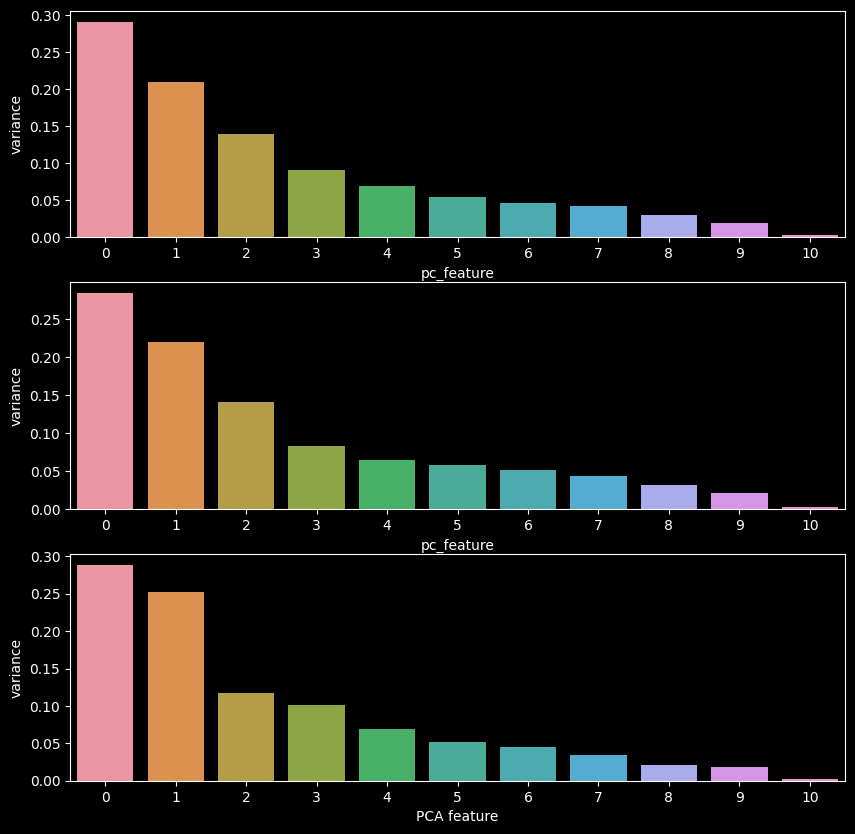

In [ ]:
pca_feature_var(df, 0.50)
#df에서 50% 이상의 설명력

### · 차원축소 Data Plotting
---
* 차원 축소된 데이터를 2차원 그래프로 표현

In [ ]:
 def pca_plot(df,y) :

       x=df.drop(['quality'], axis=1).reset_index(drop=True)
       y=df[y].reset_index(drop=True)

       X_ = StandardScaler().fit_transform(x)               #표준화를 위해 fit_transform을 해주는 것 (학습과 그에 맞춰 데이터 변형)

       pca = PCA(n_components=2)                            #n_components = 2는 2차원에 데이터
       pc = pca.fit_transform(X_)                           #여기서는 pipeline을 안 쓰고 정규화랑 pca를 따로 따로 진행

        #정규화랑 pca 를 진행한 데이터 중 컬럼명이 PC1과 PC2인 데이터를 데이터프레임으로 바꾸고, 이걸 y랑 concat
       pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
       pc_df=pd.concat([pc_df,y],axis=1)

        #plt.gcf().set_size_inches(10,10) 이랑 같은 결과
       plt.rcParams['figure.figsize'] = [10, 10]
       sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=100, linewidth=0)            #linewidth=1로 두면 선이 생김

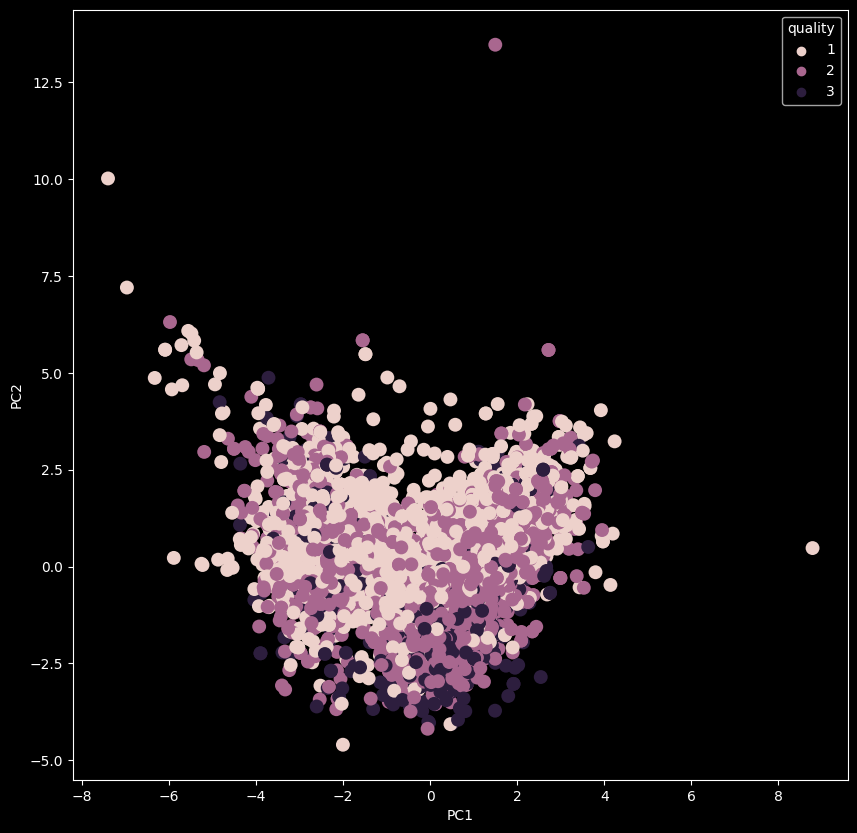

In [ ]:
pca_plot(df,'quality')

# ▶ (0,0) 중심에 모여있는 데이터들은 각 공정변수의 평균과 가까운 데이터
# ▶ (0,0) 중심에서 떨어진 데이터일수록 각 공정변수의 평균과 멀어진, 즉 산포가 큰 데이터

 #왜냐면, StandardScaler와 pca(n_components=2) 를 진행해서 정규화와 PCA가 된 2차원 데이터가 생성되었고,
  #2차원 데이터의 컬럼명으로 정의한 PC1, PC2 는 결국 df['quality']를 제외한 나머지 값들을 대변한 값들이기 때문에 0에서 멀어질 수록 평균과 멀어진 데이터임

In [ ]:
#퀄리티별로 정의
def pca_plot_prod(data) :
       roop_ix=data['quality'].unique()
       fig, ax = plt.subplots(len(roop_ix), 1, figsize = (5, 10))

       for i,x in enumerate(roop_ix):

           print("Fig.",i+1,": ",x)


           df1=data[(data['quality']==x)]
           X=df1.drop(['quality'], axis=1)
           y=df1.quality

           X_ = StandardScaler().fit_transform(X)

           pca = PCA(n_components=2)
           pc = pca.fit_transform(X_)

           pc_df=pd.DataFrame(pc,columns=['PC1','PC2'])

           pc_df['quality']=x

           sns.scatterplot(ax=ax[i],data=pc_df,x='PC1',y='PC2', legend='brief', s=50, linewidth=0)

Fig. 1 :  1
Fig. 2 :  2
Fig. 3 :  3


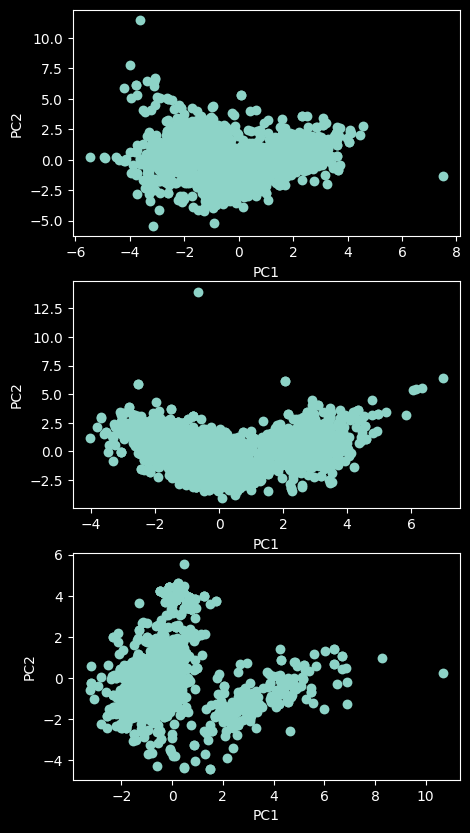

In [ ]:
# ▶ 품질(Quality)별 그래프 Plotting
pca_plot_prod(df)

## **🥇Session 3**  
**┗ 품질 등급화**  
---

### · 품질 기준 설정
---
* PCA plot 기준 A, B, C 등급 부여


In [ ]:
# ▶ 품질(Quality) 등급을 부여하기 위해, PC1값과 PC2값을 기존 데이터에 concat
# ▶ 우선 1등급에 대해서 진행

df1=df[(df['quality']==1)]
X=df1.drop(['quality'], axis=1)
X_ = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

#파이프라인
#pipeline_Pipeline([('scaler', 'StandardScaler()), ('pca', PCA(n_components=2))])
# X_ pipeline.fit_transform(X)


#컬럼명을 PC1, PC2 로 지정
pc_df=pd.DataFrame(pc,columns=['PC1','PC2'])


df1_concat = pd.concat([df1.reset_index(drop=True), pc_df], axis=1)

In [ ]:
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915


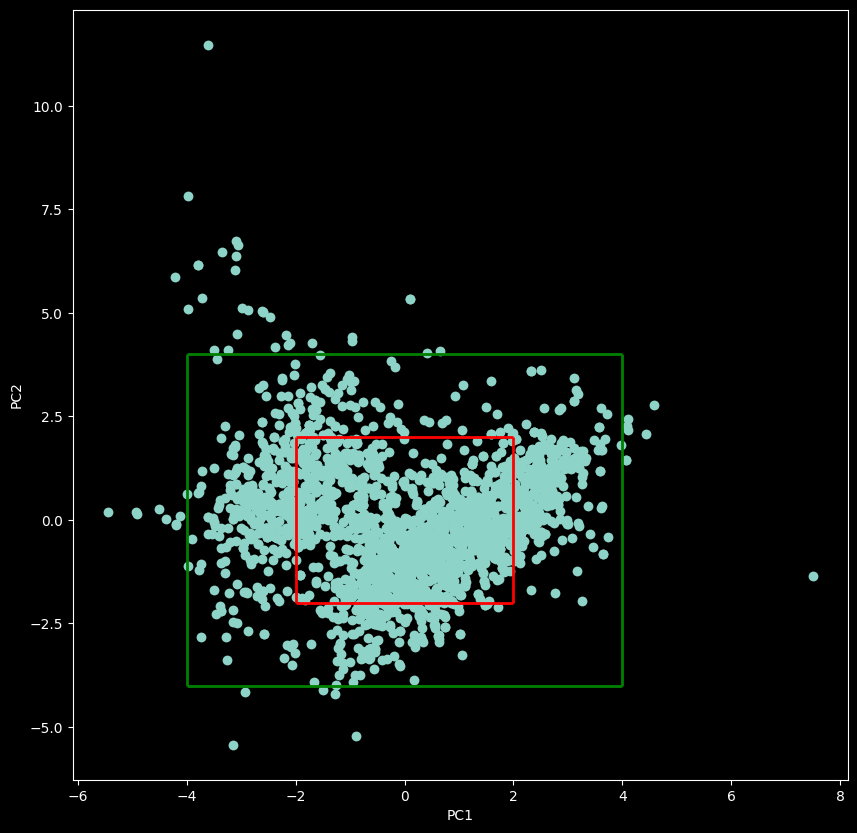

In [ ]:
# ▶ PC1, PC2인 차원 축소 변수 2, -2를 기준으로 등급을 부여
 #이 값들은 분석 결과에 따라 계속 바뀜
  #예를 들어 2,-2로 했을 때 해당 범주 밖에 있는 값들이 크게 문제가 없는 것으로 보이면, 범위를 3, -3 으로 점차 넓혀가면서 진행하면 됨


#0에서 멀어질수록 공정변수의 평균과 먼 즉, 산포가 큰 데이터

sns.scatterplot(data=df1_concat,x='PC1',y='PC2', s=50, linewidth=0);

# A grade (-2, 2)
 #axvline 은 선의 길이를 조절할 수 없이 쭉 그어지기만 함
plt.vlines(-2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.vlines(2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.hlines(-2, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(2, xmin=-2, xmax=2, color='r', linewidth=2);

# B grade (-4, 4)
plt.vlines(-4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.vlines(4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.hlines(-4, xmin=-4, xmax=4, color='g', linewidth=2);
plt.hlines(4, xmin=-4, xmax=4, color='g', linewidth=2);

plt.gcf().set_size_inches(10, 10)

### · 품질 등급 부여
---
* PCA plot 기반 A, B, C 등급 부여

In [ ]:
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915


In [ ]:
 # -2 <PC1 <2 와 -2 < PC2 < 2를 A등급
  #이게 아닌 경우에서 -4 < PC1 < 4 와 -4 < PC2 < 4인 경우 B
   #이외 C


df1_concat['grade'] = np.where( (df1_concat['PC1']>-2) & (df1_concat['PC1']<2) & (df1_concat['PC2']>-2) & (df1_concat['PC2']<2), 'A',
                               np.where((df1_concat['PC1']>-4) & (df1_concat['PC1']<4) & (df1_concat['PC2']>-4) & (df1_concat['PC2']<4), 'B', 'C') )
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667,B
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915,B


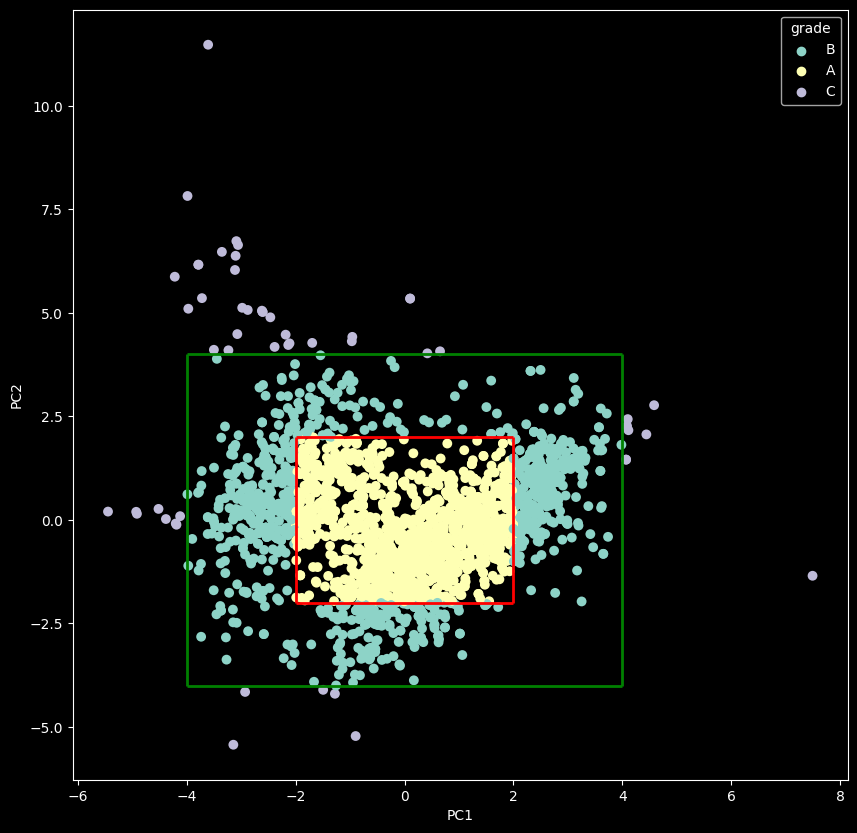

In [ ]:
#hue = 'grade'를 통해 구분
sns.scatterplot(data=df1_concat,x='PC1',y='PC2', s=50, linewidth=0, hue='grade');

# ▶ A grade
plt.vlines(-2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.vlines(2, ymin=-2, ymax=2, color='r', linewidth=2);

plt.hlines(-2, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(2, xmin=-2, xmax=2, color='r', linewidth=2);

# ▶ B grade
plt.vlines(-4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.vlines(4, ymin=-4, ymax=4, color='g', linewidth=2);

plt.hlines(-4, xmin=-4, xmax=4, color='g', linewidth=2);
plt.hlines(4, xmin=-4, xmax=4, color='g', linewidth=2);

plt.gcf().set_size_inches(10, 10)

### · 품질 등급에 따른 공정변수 확인
---
* PCA plot 기반 A, B, C 등급 부여

In [ ]:
df1_concat['fixed acidity'].mean() -

7.3299916107382534

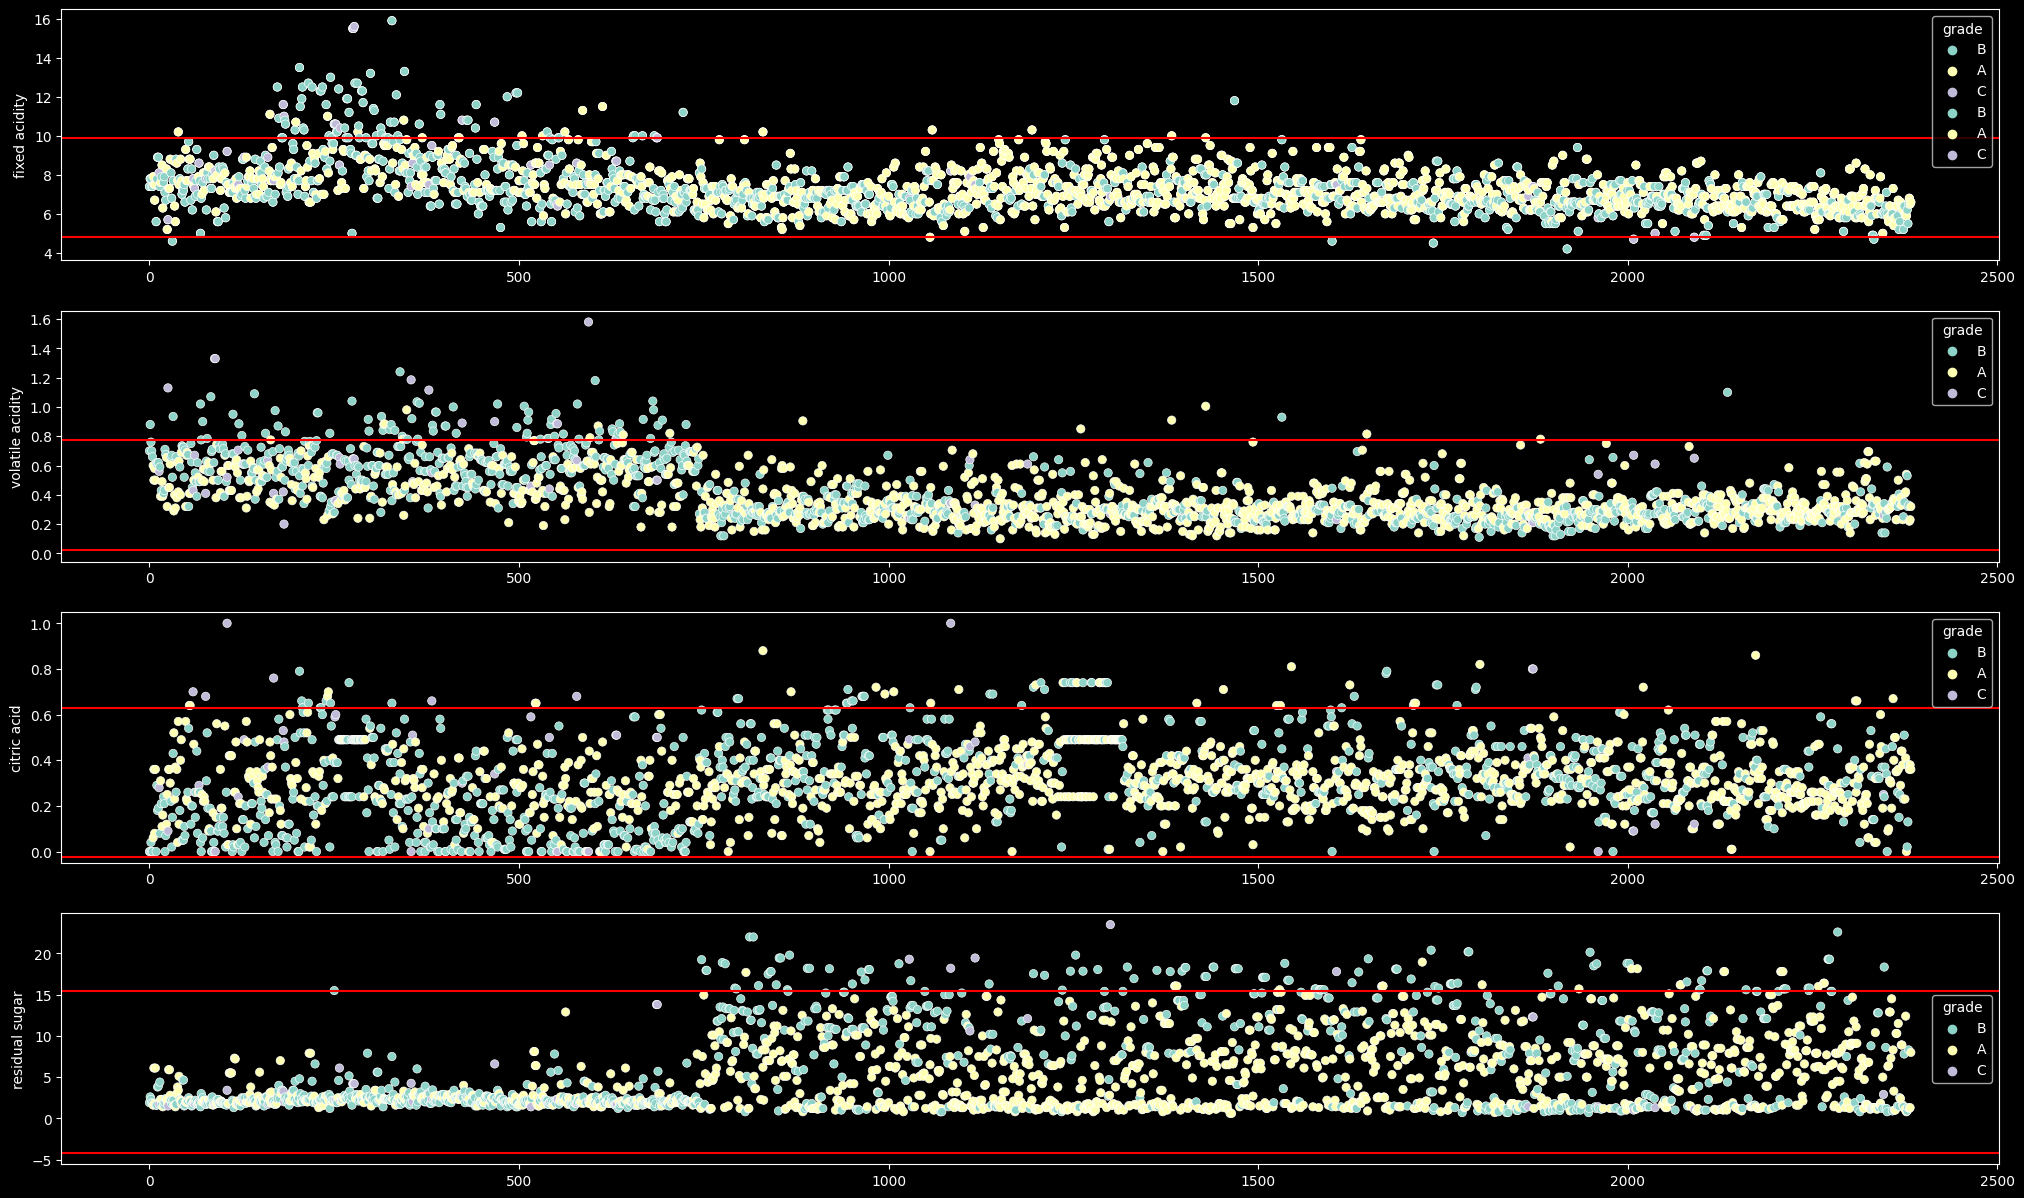

In [ ]:
# sns.scatterplot에서 특정 항목별로 분포도를 확인하고, hue='grade'로 지정해서 세부 등급별 분포 확인
fig, axes = plt.subplots(4,1)

sns.scatterplot(data = df1_concat, x=df1_concat.index, y='fixed acidity', hue = 'grade', ax=axes[0]);

check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
for i, columns in enumerate(check):
    sns.scatterplot(x=df1_concat.index, y=df1_concat[columns], hue = df1_concat['grade'], ax = axes[i])
    axes[i].axhline((df1_concat[columns].mean() - 2*df1_concat[columns].std()), color = 'r' )
    axes[i].axhline((df1_concat[columns].mean() + 2*df1_concat[columns].std()), color = 'r' )

plt.gcf().set_size_inches(25, 15)
# ▶ 1등급의 Wine이라도 C등급은 모든 공정변수 기준으로 평균값(center) 값에서 멀어지는 경향이 크다

In [ ]:
# ▶ copy
df = df1_concat.copy()

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667,B
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915,B


In [ ]:
# ▶ 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
 #변수별로 grade 예측하기

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(['quality', 'PC1','PC2','grade'], axis=1)
Y = df['grade']


#RandomForestClassifier을 통해 multiclass classification 문제 해결
 #여기서는 등급이 A,B,C 이기 때문에 이진 분류가 아닌 multiclass classification 문제
# stratify =Y 를 통해 데이터 값이 한 쪽으로 쏠리지 않게 지정
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1668, 11)
(1668,)
(716, 11)
(716,)


In [ ]:
# ▶ 모델 학습
 #n_estimators =500, max_depth=6 정도로 지정해서 과적합 방지

rfc = RandomForestClassifier(n_estimators=500, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           A       0.91      0.98      0.94       938
           B       0.95      0.87      0.91       693
           C       1.00      0.51      0.68        37

    accuracy                           0.93      1668
   macro avg       0.95      0.79      0.84      1668
weighted avg       0.93      0.93      0.92      1668

              precision    recall  f1-score   support

           A       0.84      0.93      0.88       402
           B       0.86      0.78      0.81       298
           C       1.00      0.25      0.40        16

    accuracy                           0.85       716
   macro avg       0.90      0.65      0.70       716
weighted avg       0.85      0.85      0.84       716



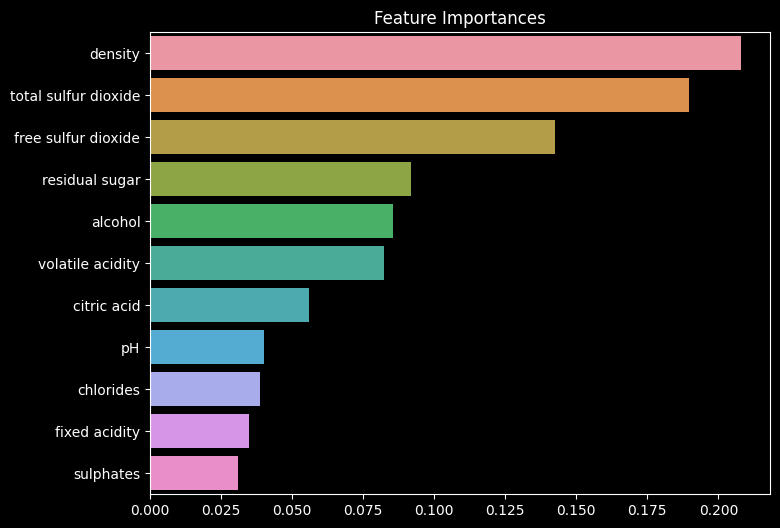

In [ ]:
#feature_importances_ 를 통해 등급에 중요한 영향을 미치는 변수 파악
 #물론 여기서 판단하는 중요한 영향을 미치는 변수는 위에서 학습한 모델에 근간한 결과임
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['seaborn-bright'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#이 모델에 근간해서 중요변수를 판단한 결과 density가 가장 높게 나옴
 #즉, density를 잘 관리해서 등급별 세부 품질을 일정하게 유지할 가능성이 높다고 예측